# WildlifeReID-10k analysis

This notebook analyzes the WildlifeReID-10k dataset. First load the necessary packages. 

In [1]:
import os
import numpy as np
import pandas as pd
from wildlife_datasets import datasets, splits
from utils import license_conversion, getFolderSize, rename_index, load_clusters

We specify the roots, load the dataset and features and verify whether the orderings of the dataset and the features correspond to each other.

In [2]:
root = '/data/wildlife_datasets/data/WildlifeReID10k'
root_images = os.path.join(root, 'images')
save_clusters_prefix = 'clusters/cluster'
d = datasets.WildlifeReID10k(root)
df = d.df
df['date'] = pd.to_datetime(df['date'])

We show a summary of each species based on both the number of images and individuals.

In [3]:
summary_species = {}
for name, df_red in df.groupby('species'):
    summary_species[name] = {
        'images': len(df_red),
        'individuals': df_red['identity'].nunique(),
    }
summary_species = pd.DataFrame(summary_species).T
summary_species.loc['TOTAL'] = summary_species.sum()
with open('summary_species.txt', 'w') as text_file:
    text_file.write(summary_species.to_latex())
summary_species

images  individuals
bird          2629           50
cat          13021          509
chicken       1146           50
chimpanzee    6974          106
cow          23465          465
dog          10020         1584
dolphin       2657           82
fish           336            6
giraffe       2032          329
hyena         3129          256
leopard       6806          430
macaque       1079           57
nyala         1942          237
panda         6874           50
polar bear    1391           13
sea star      2187           95
sea turtle   22709         2928
seal          2080           57
shark         7693          543
tiger         5415          182
whale         8559          788
zebra         8396         1960
TOTAL       140540        10777

Similarly, we show a summary of each dataset. We also add under which licenses were the datasets published.

In [4]:
summary_datasets = {}
for name, df_red in df.groupby('dataset'):
    metadata = eval(f'datasets.{name}.summary')
    if 'licenses' in metadata:
        license = metadata['licenses']
    else:
        license = 'Missing'    
    summary_datasets[name] = {
        'images': len(df_red),
        'individuals': df_red['identity'].nunique(),
        'size (GB)': np.round(getFolderSize(os.path.join(root_images, name)) / 1024**3, 2),
        'wild': metadata['wild'],
        'license': license_conversion[license],
    }

summary_datasets = pd.DataFrame(summary_datasets).T.sort_index(key=lambda x: x.str.lower())
summary_datasets.loc['TOTAL'] = summary_datasets.sum()
summary_datasets.loc['TOTAL', ['license', 'wild']] = ''
for col in ['images', 'individuals']:
    summary_datasets[col] = summary_datasets[col].astype(int)
for col in ['size (GB)']:
    summary_datasets[col] = summary_datasets[col].astype(float)
with open('summary_datasets.txt', 'w') as text_file:
    text_file.write(rename_index(summary_datasets).replace({True: '\\cmark', False: '\\xmark'}).to_latex(float_format="%.2f"))
summary_datasets['ratio'] = np.round(summary_datasets['images'] / summary_datasets['individuals'],1)
summary_datasets

images  individuals  size (GB)   wild  \
AAUZebraFish                336            6       0.02  False   
AerialCattle2017           2329           23       0.02  False   
AmvrakikosTurtles           200           50       0.09   True   
ATRW                       5415          182       0.27  False   
BelugaID                   8559          788       0.26   True   
BirdIndividualID           2629           50       0.03  False   
CatIndividualImages       13021          509       9.01  False   
Chicks4FreeID              1146           50       0.20  False   
CowDataset                 1485           13       1.66  False   
Cows2021                   8670          179       0.11  False   
CTai                       4662           71       0.33   True   
CZoo                       2109           24       0.24  False   
DogFaceNet                 8363         1393       0.08  False   
FriesianCattle2015          193           25       0.03  False   
FriesianCattle2017          940           89       0.18  False   
Giraffes                   1393          178       0.09   True   
GiraffeZebraID             6925         2056       1.03   True   
HyenaID2022                3129          256       0.44   True   
IPanda50                   6874           50       0.35  False   
LeopardID2022              6806          430       0.85   True   
MPDD                       1657          191       0.02  False   
MultiCamCows2024           5112           90       0.07  False   
NDD20                      2657           82       0.07   True   
NyalaData                  1942          237       0.46   True   
OpenCows2020               4736           46       0.04  False   
PolarBearVidID             1391           13       0.01  False   
PrimFace                   1282           68       3.08  False   
ReunionTurtles              336           84       0.02   True   
SealID                     2080           57       0.26   True   
SeaStarReID2023            2187           95       1.66  False   
SeaTurtleID2022            8729          438       0.13   True   
SMALST                     1290           10       0.08  False   
SouthernProvinceTurtles     481           51       0.05   True   
StripeSpotter               820           45       0.02   True   
WhaleSharkID               7693          543       1.57   True   
ZakynthosTurtles            160           40       0.01   True   
ZindiTurtleRecall         12803         2265       2.09  False   
TOTAL                    140540        10777      24.93          

                                     license  ratio  
AAUZebraFish                       CC BY 4.0   56.0  
AerialCattle2017               NC-Government  101.3  
AmvrakikosTurtles                      Other    4.0  
ATRW                         CC BY-NC-SA 4.0   29.8  
BelugaID                 CDLA-Permissive-1.0   10.9  
BirdIndividualID                        None   52.6  
CatIndividualImages                CC BY 4.0   25.6  
Chicks4FreeID                      CC BY 4.0   22.9  
CowDataset                         CC BY 4.0  114.2  
Cows2021                       NC-Government   48.4  
CTai                                   Other   65.7  
CZoo                                   Other   87.9  
DogFaceNet                               MIT    6.0  
FriesianCattle2015             NC-Government    7.7  
FriesianCattle2017             NC-Government   10.6  
Giraffes                                None    7.8  
GiraffeZebraID           CDLA-Permissive-1.0    3.4  
HyenaID2022              CDLA-Permissive-1.0   12.2  
IPanda50                                None  137.5  
LeopardID2022            CDLA-Permissive-1.0   15.8  
MPDD                               CC BY 4.0    8.7  
MultiCamCows2024               NC-Government   56.8  
NDD20                        CC BY-NC-SA 4.0   32.4  
NyalaData                               None    8.2  
OpenCows2020                   NC-Government  103.0  
PolarBearVidID                     CC BY 4.0  

## Analysis of the split

We load the training and testing set and compute the identities in both sets. 

In [5]:
idx_train = np.where(df['split'] == 'train')[0]
idx_test = np.where(df['split'] == 'test')[0]
identity_train = df.iloc[idx_train]['identity'].unique()
identity_test = df.iloc[idx_test]['identity'].unique()
identity_test_only = set(identity_test) - set(identity_train)
identities = df['identity'].unique()

A short analysis of the split shows that the training set contains 78.03% images. There are 10.68% (approximaly half of the testing set) images who depict new individuals (not in the training set). The images in the training set only (946) are individuals with only one image.

In [6]:
splits.analyze_split(df, idx_train, idx_test)

Split: time-unaware open-set
Samples: train/test/unassigned/total = 109662/30878/0/140540
Classes: train/test/unassigned/total = 9831/9831/0/10777
Samples: train only/test only        = 946/15016
Classes: train only/test only/joint  = 946/946/8885

Fraction of train set     = 78.03%
Fraction of test set only = 10.68%


In [7]:
summary = {}
for name, df_dataset in df.groupby('dataset'):
    idx_train = df_dataset[df_dataset['split'] == 'train'].index
    idx_test = df_dataset[df_dataset['split'] == 'test'].index

    split_data = splits.extract_data_split(df_dataset, idx_train, idx_test)

    if split_data['id_split'] != 'open-set':
        raise Exception('split is not closed set')
    summary[name] = {
        'n': split_data['n'],
        'n_individuals': split_data['n_ids'],
        'ratio_train': split_data['n_train'] / split_data['n'],
        'ratio_test': split_data['n_test'] / split_data['n'],
        'ratio_test_only': split_data['n_test_only'] / split_data['n'],
        #'ratio_train_only': split_data2['n_train_only'] / split_data2['n'],
    }
summary = pd.DataFrame(summary).T
summary[['n', 'n_individuals']] = summary[['n', 'n_individuals']].astype(int)
summary

n  n_individuals  ratio_train  ratio_test  \
AAUZebraFish               336              6     0.806548    0.193452   
ATRW                      5415            182     0.802031    0.197969   
AerialCattle2017          2329             23     0.799914    0.200086   
AmvrakikosTurtles          200             50     0.675000    0.325000   
BelugaID                  8559            788     0.771235    0.228765   
BirdIndividualID          2629             50     0.800304    0.199696   
CTai                      4662             71     0.799657    0.200343   
CZoo                      2109             24     0.800379    0.199621   
CatIndividualImages      13021            509     0.801167    0.198833   
Chicks4FreeID             1146             50     0.799302    0.200698   
CowDataset                1485             13     0.800673    0.199327   
Cows2021                  8670            179     0.800000    0.200000   
DogFaceNet                8363           1393     0.739089    0.260911   
FriesianCattle2015         193             25     0.761658    0.238342   
FriesianCattle2017         940             89     0.774468    0.225532   
GiraffeZebraID            6925           2056     0.740650    0.259350   
Giraffes                  1393            178     0.771716    0.228284   
HyenaID2022               3129            256     0.786194    0.213806   
IPanda50                  6874             50     0.800553    0.199447   
LeopardID2022             6806            430     0.779165    0.220835   
MPDD                      1657            191     0.783343    0.216657   
MultiCamCows2024          5112             90     0.800665    0.199335   
NDD20                     2657             82     0.800151    0.199849   
NyalaData                 1942            237     0.761586    0.238414   
OpenCows2020              4736             46     0.799198    0.200802   
PolarBearVidID            1391             13     0.800144    0.199856   
PrimFace                  1282             68     0.791732    0.208268   
ReunionTurtles             336             84     0.669643    0.330357   
SMALST                    1290             10     0.802326    0.197674   
SeaStarReID2023           2187             95     0.802012    0.197988   
SeaTurtleID2022           8729            438     0.794249    0.205751   
SealID                    2080             57     0.800481    0.199519   
SouthernProvinceTurtles    481             51     0.775468    0.224532   
StripeSpotter              820             45     0.797561    0.202439   
WhaleSharkID              7693            543     0.786039    0.213961   
ZakynthosTurtles           160             40     0.675000    0.325000   
ZindiTurtleRecall        12803           2265     0.720690    0.279310   

                         ratio_test_only  
AAUZebraFish                    0.163690  
ATRW                            0.101939  
AerialCattle2017                0.143409  
AmvrakikosTurtles               0.100000  
BelugaID                        0.100129  
BirdIndividualID                0.111449  
CTai                            0.105534  
CZoo                            0.119962  
CatIndividualImages             0.103525  
Chicks4FreeID                   0.105585  
CowDataset                      0.143434  
Cows2021                        0.105190  
DogFaceNet                      0.102116  
FriesianCattle2015              0.124352  
FriesianCattle2017              0.101064  
GiraffeZebraID                  0.101227  
Giraffes                        0.103374  
HyenaID2022                     0.105465  
IPanda50                        0.117835  
LeopardID2022                   0.106818  
MPDD                            0.101388  
MultiCamCows2024                0.105634  
NDD20                           0.106887  
NyalaData                       0.106591  
OpenCows2020                    0.130068  
PolarBearVidID                  0.148814  
PrimFace                        0.113105  
ReunionTurtl

We now load the clusters based on which the split was created.

In [8]:
clusters_all = load_clusters(identities, save_clusters_prefix)

Performing a short analysis, we see that we found 10430 clusters with 28187 images and the majority of these clustered images is in the training set. The clustered images are 20.0% (28187/140540) of the training set. Without such clustering, some of these images would be in the testing set and there would be a significant leak between the training and testing sets.

In [9]:
n_clusters = 0
n_clustered_images = 0
n_clustered_images_train = 0
n_clustered_images_test = 0
n_clustered_images_test_only = 0
for identity in identities:
    if identity not in identity_test_only:
        for cluster in clusters_all[identity]:
            n_clusters += 1
            n_clustered_images += len(cluster)
            for i in cluster:
                if i in idx_train:
                    n_clustered_images_train += 1
                elif i in idx_test:
                    n_clustered_images_test += 1
print(f'There were {n_clusters} clusters with {n_clustered_images} images.')
print(f'Altogether {n_clustered_images_train} clustered images were in the training set.')
print(f'Altogether {n_clustered_images_test} clustered images were in the testing set.')

There were 10430 clusters with 28187 images.
Altogether 1058 clustered images were in the training set.
Altogether 0 clustered images were in the testing set.


Plotting clusters for each dataset shows that the clustered images are indeed very similar to each other.

/home/sadda/Projects/wildlife-datasets/baselines/../wildlife_datasets/datasets/datasets.py:769: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


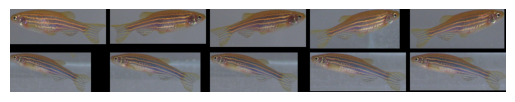

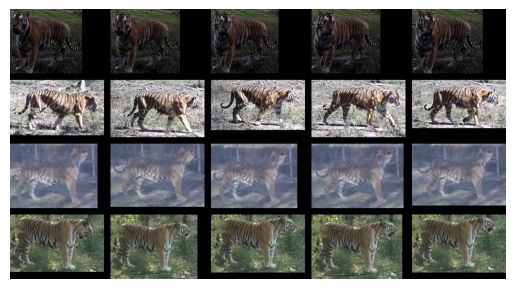

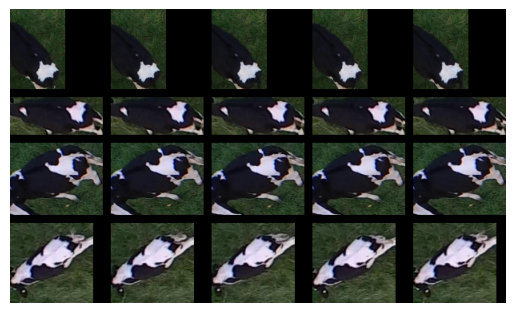

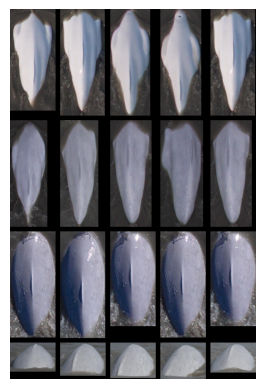

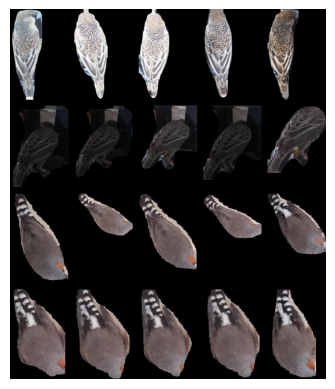

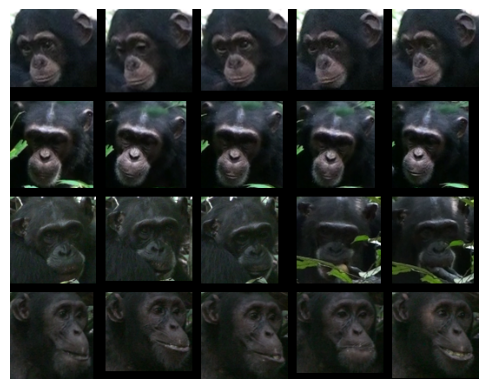

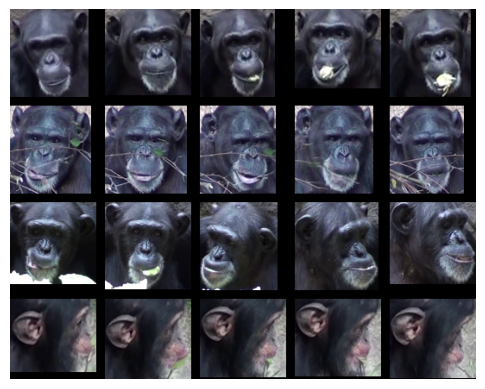

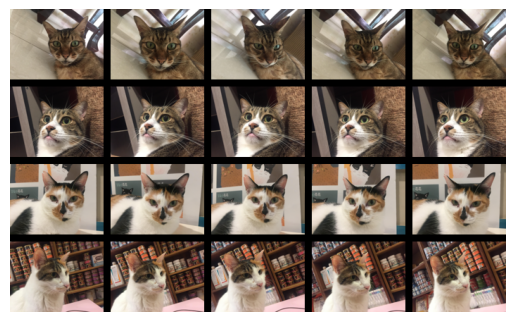

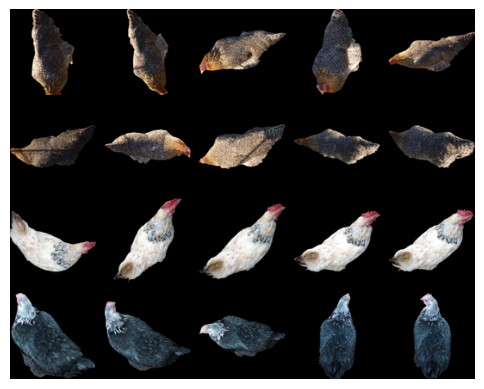

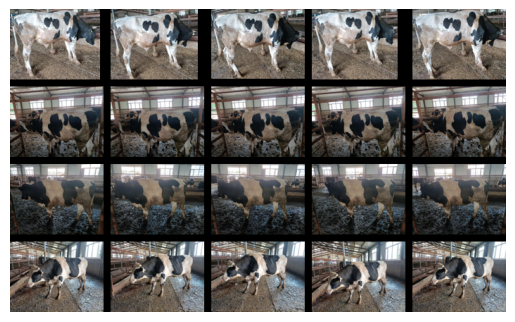

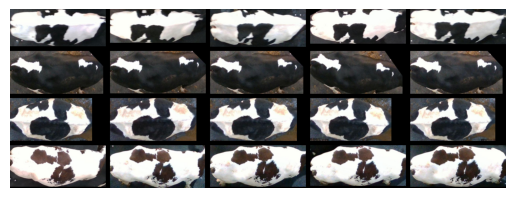

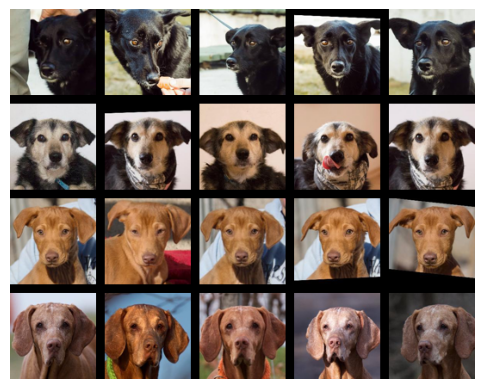

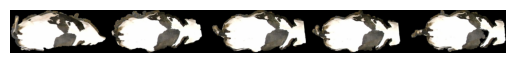

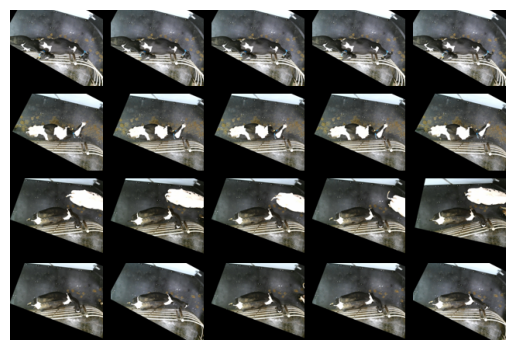

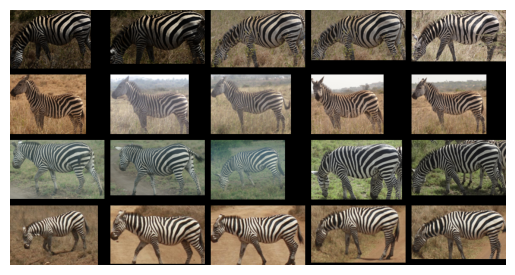

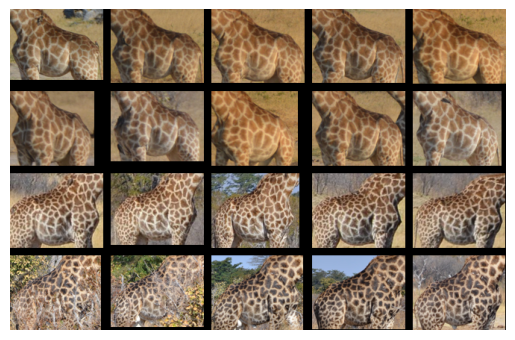

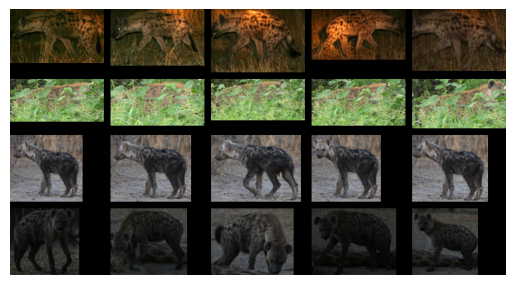

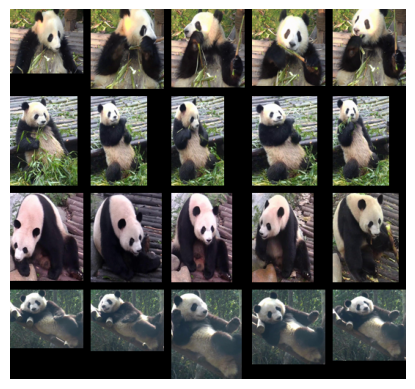

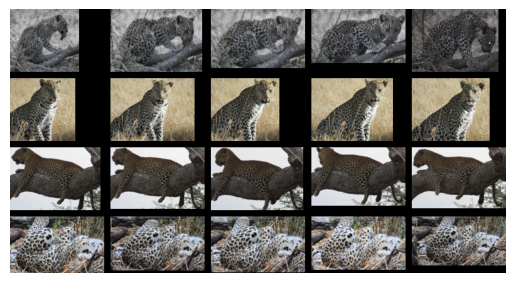

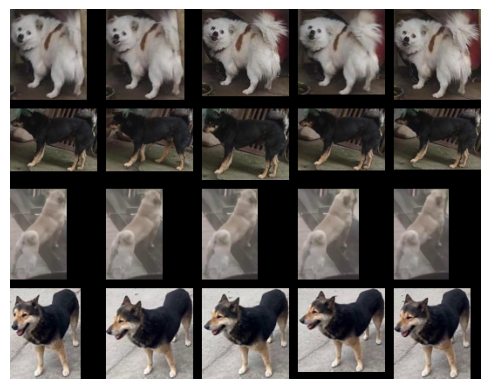

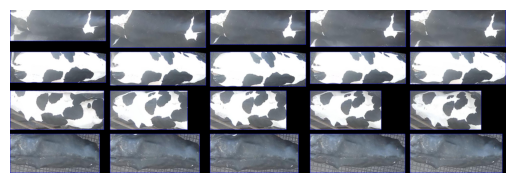

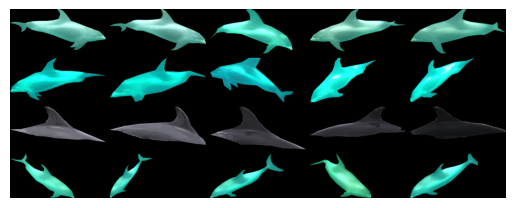

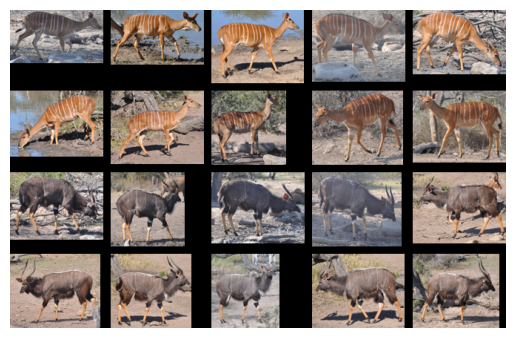

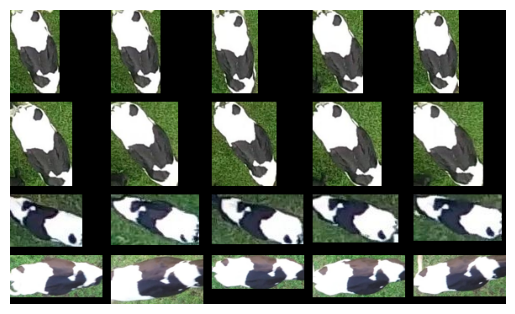

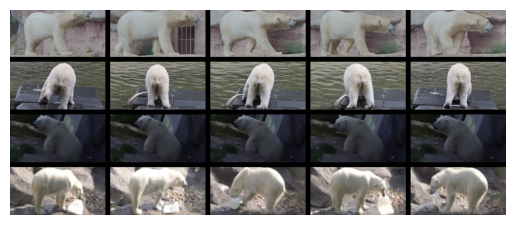

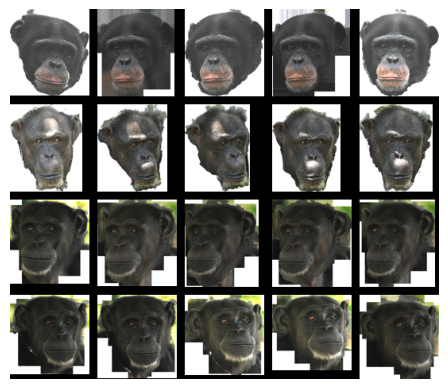

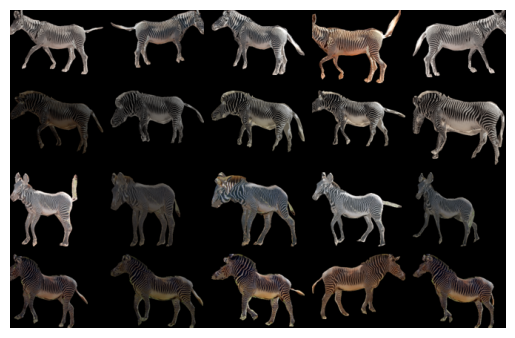

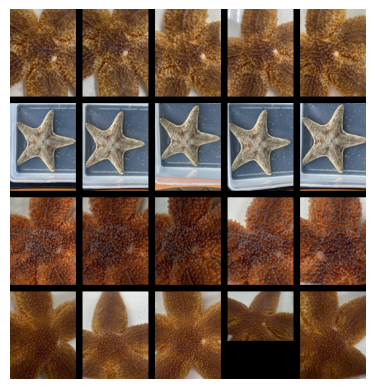

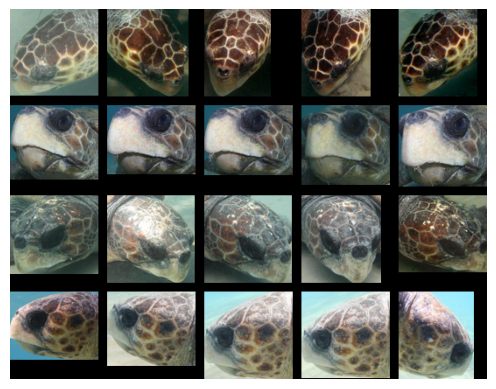

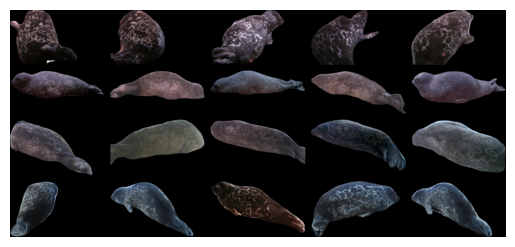

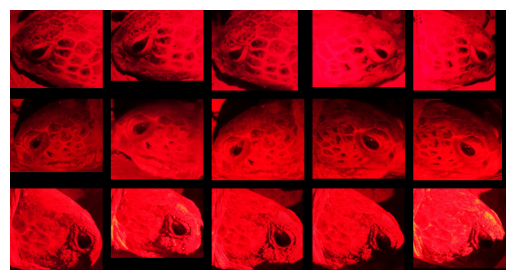

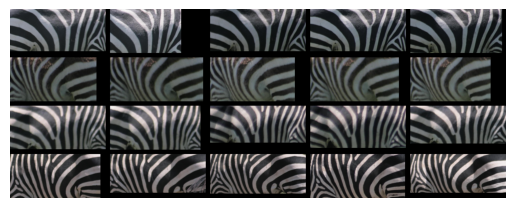

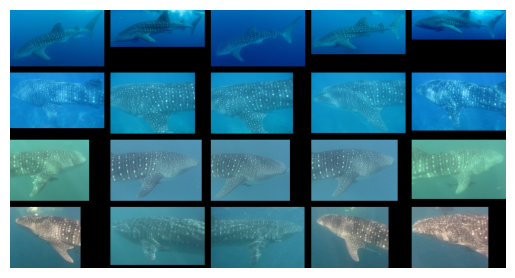

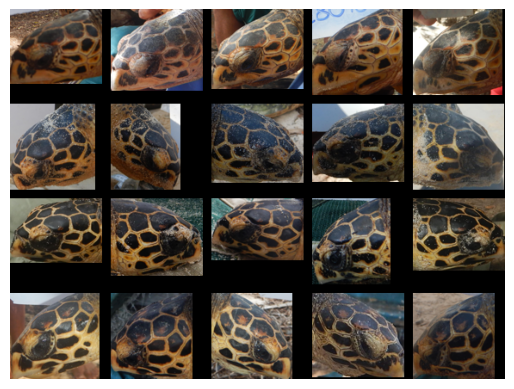

In [10]:
for _, df_dataset in df.groupby('dataset'):
    idx = []
    for identity in df_dataset['identity'].unique():
        for cluster in clusters_all[identity]:
            if len(cluster) == 5:
                idx += cluster
        if len(idx) >= 20:
            break
    if len(idx) > 0:
        d.plot_grid(idx=idx, n_rows=4, n_cols=5, rotate=False);